In [38]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [19]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3), input_shape=(28,28,1), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 1, 1, 64)         

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(train_images,train_labels,batch_size=32, epochs=15, validation_split=0.1)

Epoch 1/15



1688/1688 [==============================] - 45s 26ms/step - loss: 0.0576 - accuracy: 0.9300 - val_loss: 0.0138 - val_accuracy: 0.9808
Epoch 2/15
1688/1688 [==============================] - 32s 19ms/step - loss: 0.0162 - accuracy: 0.9754 - val_loss: 0.0116 - val_accuracy: 0.9820
Epoch 3/15
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0127 - accuracy: 0.9805 - val_loss: 0.0101 - val_accuracy: 0.9845
Epoch 4/15
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0106 - accuracy: 0.9830 - val_loss: 0.0142 - val_accuracy: 0.9792
Epoch 5/15
1688/1688 [==============================] - 21s 13ms/step - loss: 0.0090 - accuracy: 0.9856 - val_loss: 0.0107 - val_accuracy: 0.9865
Epoch 6/15
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0077 - accuracy: 0.9876 - val_loss: 0.0087 - val_accuracy: 0.9877
Epoch 7/15
1688/1688 [==============================] - 21s 13ms/step - loss: 0.0068 - accuracy: 0.9899 - val_loss: 0.0092 - val_accura

In [23]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.0188 - accuracy: 0.9822


[0.01877630315721035, 0.982200026512146]

313/313 [==============================] - 1s 5ms/step


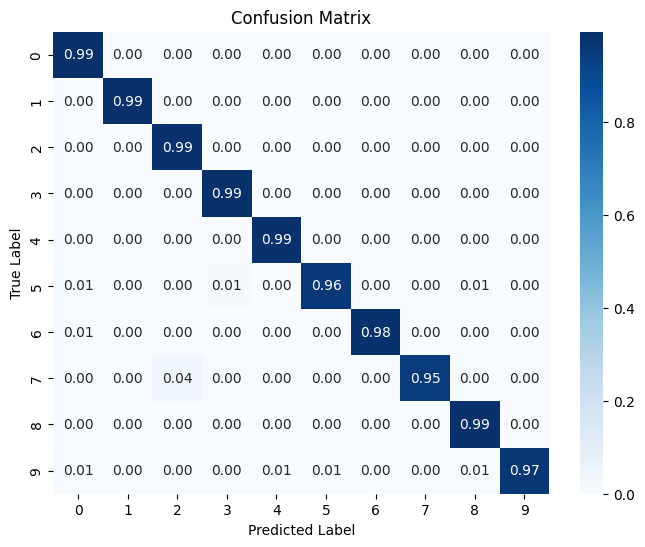

In [39]:
pred=model.predict(test_images)

pred=np.round(pred)
pred

y_test_new = np.argmax(test_labels, axis=1)
pred_new = np.argmax(pred, axis=1)

# Plot confusion matrix
conf_mat = confusion_matrix(y_test_new, pred_new)
class_names = np.unique(y_test_new)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()